# 02: Data Visualization
In [notebook 1](/01-eda-fatalities.ipynb) we performed EDA on our data. In this notebook, we'll be using the cleaned data to create visuals of features and correlations that are relevant to building our ML model.  

---

## Data Visualization Plan
1. Import necessary python libraries.
2. Set up my custom "sunset melody" theme for all plots:
   - Set up a custom color palette using the specified colors
   - Configure seaborn to use the minimalist style with no borders or grids
3. Read [our cleaned data]('./data/cleaned_fatalities.csv') into pandas as a DataFrame.
4. Create visualisations of features and correlations relevant to ML model development:
     1. Fatalities by year (line chart)
     3. Fatal collisions by hour of day (bar chart)
     4. Fatalities by time of day: morning, afternoon, night (bar chart)
     5. Fatalities by victim type (line graph)
     6. Fatalities by age category and collision category (grouped bar chart)
     7. Age distribution by victim type (box chart)
     8. Distribution of fatalities by sex (bar chart)
     9. Distribution of fatalities by collision category (bar chart)
     10. Geographic distribution of fatalities (scatter plot on map)
     11. Heatmap of fatalities by month and day of week (heatmap)
   - For each visualization:
     - Add appropriate titles and labels
     - Apply the sunset melody color scheme
     - Print corresponding data tables
5. Perform statistical analyses relevant to ML model development:
   - Analyze trends over time
   - Identify significant relationships between variables
---

## 1. Import necessary Python libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # data visualization library
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns     # prettier data visualization library than matplotlib
from io import BytesIO     # From https://www.geeksforgeeks.org/stringio-and-bytesio-for-managing-data-as-file-object/#
import requests     # simple https library for python https://www.geeksforgeeks.org/python-requests-tutorial/
from datetime import datetime     # https://www.geeksforgeeks.org/python-datetime-module/
import re     # RegEx or Regular Expression library
import calendar
from scipy import stats

## 2. Set up my custom "sunset melody" theme for all plots.
I came up with a minimalist theme for readability and to minimize the cognitive load to visually interpret the data. The color scheme provides good contrast while maintaining aesthetic appeal, and the minimalist style keeps the focus on the data patterns.

In [29]:
# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('white')

In [30]:
# Define my very own custom sunset color palette
sunset_melody = ['#252D6E',    # dark blue
                 '#6F5B96',    # purple
                 '#B3698A',    # mauve
                 '#F08A7B',    # salmon
                 '#FFA477']    # peach

sunset_cmap = LinearSegmentedColormap.from_list(sunset_melody, sunset_melody)
sns.set_palette(sunset_melody)

## 3. Read our cleaned data into pandas as a DataFrame.

In [31]:
# Read the cleaned data into pandas.
df = pd.read_csv('../data/cleaned_fatalities.csv')
df.head()

,unique_id,case_id_fkey,latitude,longitude,collision_year,death_date,death_time,death_datetime,collision_date,collision_time,...,police_district,data_as_of,data_loaded_at,age_category,collision_category,collision_hour,time_of_day,collision_year_clean,collision_month,collision_day
0,1,140236301,37.710409,-122.404226,2014,2014-03-20,11:21:00,2014-03-20 11:21:00,2014-03-20,NaN,...,INGLESIDE,2024-09-18 12:00:00,2025-04-08 04:35:01,Senior (65+),Pedestrian,NaN,Afternoon (12pm-5pm),2014,3,20
1,2,140755533,37.725476,-122.394243,2014,2014-09-08,16:38:00,2014-09-08 04:38:00,2014-09-08,05:10:00,...,BAYVIEW,2024-09-18 12:00:00,2025-04-08 04:35:01,Senior (65+),Pedestrian,5.0,Morning (5am-12pm),2014,9,8
2,4,140365546,37.748255,-122.413669,2014,2014-05-03,17:20:00,2014-05-03 05:20:00,2014-05-03,02:24:00,...,MISSION,2024-09-18 12:00:00,2025-04-08 04:35:01,Young Adult (18-34),Vehicle,2.0,Night (9pm-5am),2014,5,3
3,16,150562049,37.777300,-122.419694,2015,2015-06-30,06:00:00,2015-06-30 06:00:00,2015-06-28,03:52:00,...,NORTHERN,2024-09-18 12:00:00,2025-04-08 04:35:01,Adult (35-64),Motorcycle,3.0,Night (9pm-5am),2015,6,28
4,17,140104811,37.778251,-122.419883,2014,2014-02-06,10:20:00,2014-02-06 10:20:00,2014-02-05,02:26:00,...,NORTHERN,2024-09-18 12:00:00,2025-04-08 04:35:01,Adult (35-64),Pedestrian,2.0,Night (9pm-5am),2014,2,5


## 4. Create visualizations.
### A. Fatalities by Year, 2014-2025 (line chart)

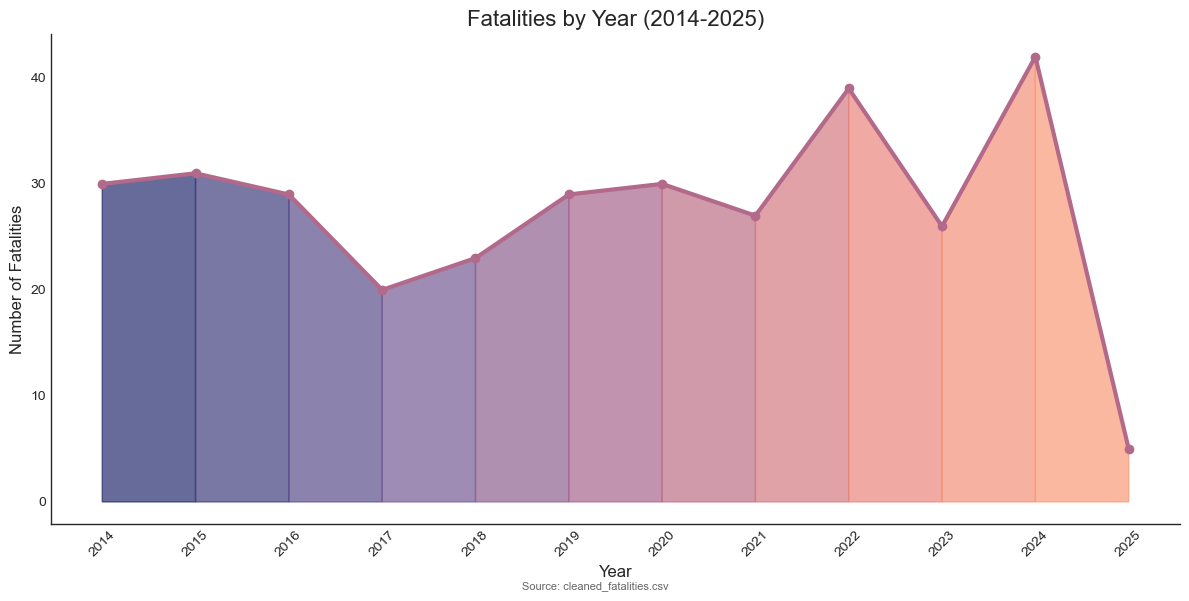



Fatalities by Year, 2014-2025:


    collision_year_clean  Count
0                   2014     30
1                   2015     31
2                   2016     29
3                   2017     20
4                   2018     23
5                   2019     29
6                   2020     30
7                   2021     27
8                   2022     39
9                   2023     26
10                  2024     42
11                  2025      5




In [48]:
# A. Fatalities by year (line chart)
plt.figure(figsize = (12, 6))
year_counts = df.groupby('collision_year_clean').size().reset_index(name = 'Count')

# Create the line chart
plt.plot(year_counts['collision_year_clean'], 
         year_counts['Count'], 
         marker = 'o', 
         linewidth = 3, 
         color = sunset_melody[2]
        )

# Create gradient fill under the curve
x = year_counts['collision_year_clean']
y = year_counts['Count']

# For each x segment, create a polygon with gradient fill
for i in range(len(x)-1):
    # Create points for the polygon
    x_segment = [x[i], x[i+1], x[i+1], x[i]]
    y_segment = [y[i], y[i+1], 0, 0]
    
    # Calculate the color position in the gradient (0 to 1)
    color_pos = i / (len(x)-1)
    
    # Fill the polygon with the color from the gradient
    plt.fill(x_segment, y_segment, color = sunset_cmap(color_pos), alpha = 0.7)

# Add labels and title
plt.title('Fatalities by Year (2014-2025)', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.grid(False)

# Set x-axis ticks to show all years
plt.xticks(year_counts['collision_year_clean'], rotation = 45)

# Remove spines
sns.despine()

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-yearly.png')    # Save plot as image file
plt.show()

# Print the table
print('\n')
print('Fatalities by Year, 2014-2025:')
print('\n')
print(year_counts)
print('\n')

### B. Fatal Collisions by Hour of Day, 2014-2025 (bar chart)
This bar chart visualizes fatal traffic collisions by hour of day using our cleaned data. The chart shows peaks in fatal collisions around 01:00 and 12:00, with a low around 04:00, indicating collision frequency varies significantly depending on the time of day, with generally decreasing collisions towards late night.

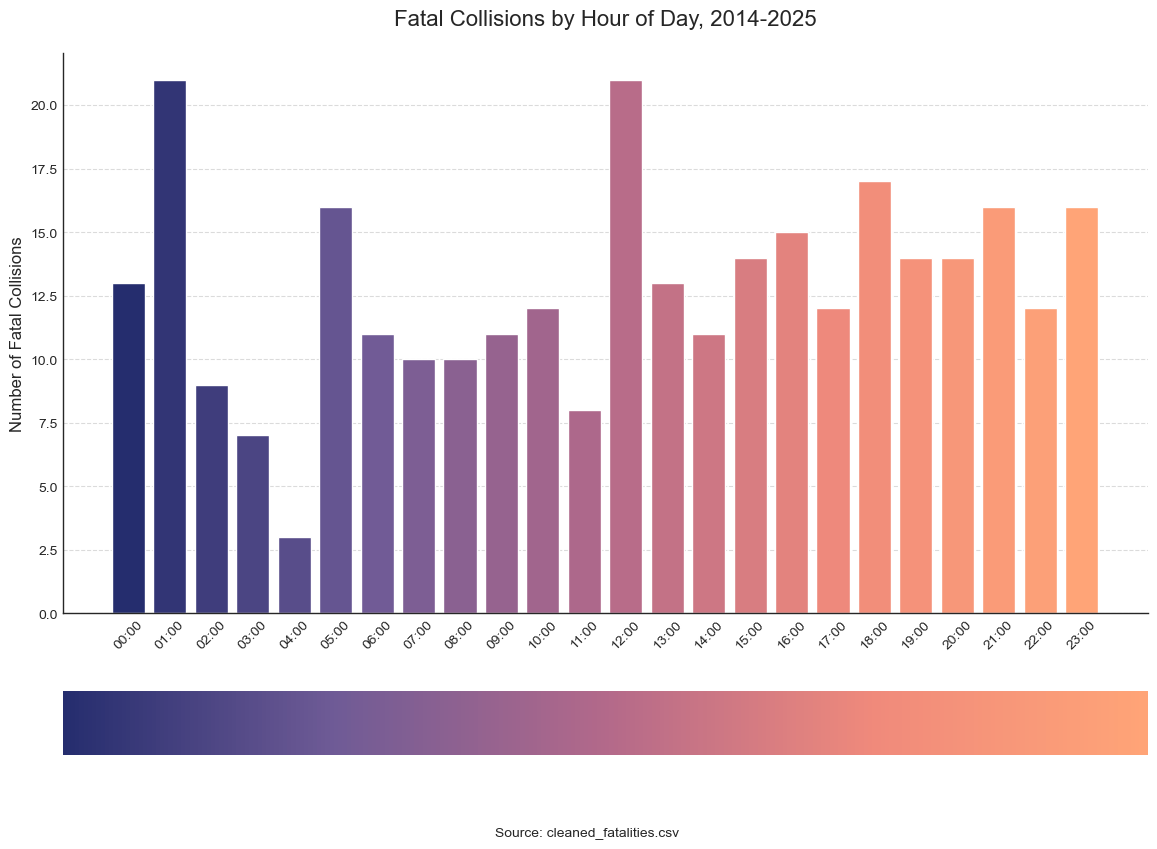


Fatal Collisions by Hour of Day, 2014-2025:

    collision_hour  Count
0              0.0     13
1              1.0     21
2              2.0      9
3              3.0      7
4              4.0      3
5              5.0     16
6              6.0     11
7              7.0     10
8              8.0     10
9              9.0     11
10            10.0     12
11            11.0      8
12            12.0     21
13            13.0     13
14            14.0     11
15            15.0     14
16            16.0     15
17            17.0     12
18            18.0     17
19            19.0     14
20            20.0     14
21            21.0     16
22            22.0     12
23            23.0     16


In [49]:
# B. Fatalities by hour of day
# Create a colormap from the sunset melody colors
cmap = mcolors.LinearSegmentedColormap.from_list('sunset_melody', sunset_melody)

# Create color array based on hour position
colors = cmap(np.linspace(0, 1, 24))

# Create a figure with appropriate size
fig = plt.figure(figsize=(14, 9))  # Increased height to accommodate all elements
hour_counts = df.groupby('collision_hour').size().reset_index(name = 'Count')

# Create the main axis for the bar chart (notice we're not using gridspec here)
ax = plt.subplot2grid((10, 1), (0, 0), rowspan=8)  # Main plot takes 8/10 of the height

# Create the bar chart with gradient colors
bars = ax.bar(hour_counts['collision_hour'], hour_counts['Count'], color=colors, width=0.8)

# Format x-axis with hour labels (00:00, 01:00, etc.)
hour_labels = [f'{h:02d}:00' for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45)

# Set title and labels
ax.set_title('Fatal Collisions by Hour of Day, 2014-2025', fontsize = 16, pad = 20)
ax.set_xlabel('')
ax.set_ylabel('Number of Fatal Collisions', fontsize = 12)

# Set y-axis to start at 0
ax.set_ylim(bottom = 0)

# Add horizontal grid lines with dashed style
ax.yaxis.grid(True, linestyle = '--', alpha = 0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a colorbar in a separate subplot below the main plot
cbar_ax = plt.subplot2grid((10, 1), (9, 0), rowspan = 1)  # Colorbar takes bottom row
cbar_ax.set_axis_off()  # Hide the axis of the colorbar
ColorbarBase(cbar_ax, cmap=cmap, orientation = 'horizontal')

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha = 'center', fontsize = 10)

# Adjust the layout with more space between elements
plt.subplots_adjust(bottom = 0.1, hspace = 0.1)
plt.savefig('../image/fatalities-hourly.png')    # Save plot as image file
plt.show()

# Print the table
print('\nFatal Collisions by Hour of Day, 2014-2025:\n')
print(hour_counts)

### C. Fatalities by Time of Day, 2014-2025 (bar chart)

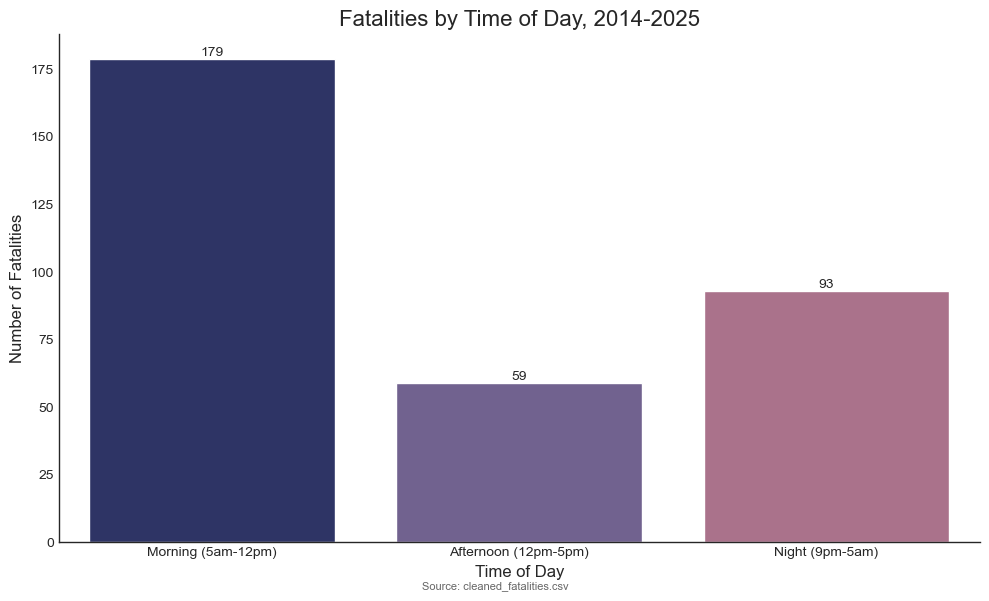


Fatalities by Time of Day, 2014-2025:

            Time of Day  Count
0    Morning (5am-12pm)    179
2  Afternoon (12pm-5pm)     59
1       Night (9pm-5am)     93




In [50]:
# C. Fatalities by time of day (bar chart)
plt.figure(figsize = (10, 6))
time_counts = df['time_of_day'].value_counts().reset_index()
time_counts.columns = ['Time of Day', 'Count']

# Sort by a logical order of time
time_order = ['Morning (5am-12pm)', 'Afternoon (12pm-5pm)', 'Night (9pm-5am)']
time_counts['Time of Day'] = pd.Categorical(time_counts['Time of Day'], categories = time_order, ordered = True)
time_counts = time_counts.sort_values('Time of Day')

# Create the bar chart
ax = sns.barplot(
    x = 'Time of Day',
    y = 'Count', 
    data = time_counts,
    hue='Time of Day',  # Add hue parameter
    palette=sunset_melody[:3],  # Limit palette to only 3 colors (matching categories)
    legend=False  # Hide the legend since it's redundant
)

# Add labels and title
plt.title('Fatalities by Time of Day, 2014-2025', fontsize = 16)
plt.xlabel('Time of Day', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(time_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-time-of-day.png')    # Save plot as image file
plt.show()

# Print the table
print('\nFatalities by Time of Day, 2014-2025:\n')
print(time_counts)
print('\n')

### D. Fatalities by Victim Type, 2014-2025 (line graph)  
This line graph illustrates the number of deaths per victim type yearly from 2014-2025 in San Francisco. As of the time of this writing (May 2025), we have not yet gathered data for a full year of 2025, hence the sudden drop in all victim type fatalities in that year. Aside from this, the line graph, which sources our cleaned data, shows an upward trend in pedestrian deaths by vehicle collision, a victim type that already greatly outnumbers all other victim types overall, while the other victim types show no consistent upwards or downward trend.

<Figure size 1200x800 with 0 Axes>

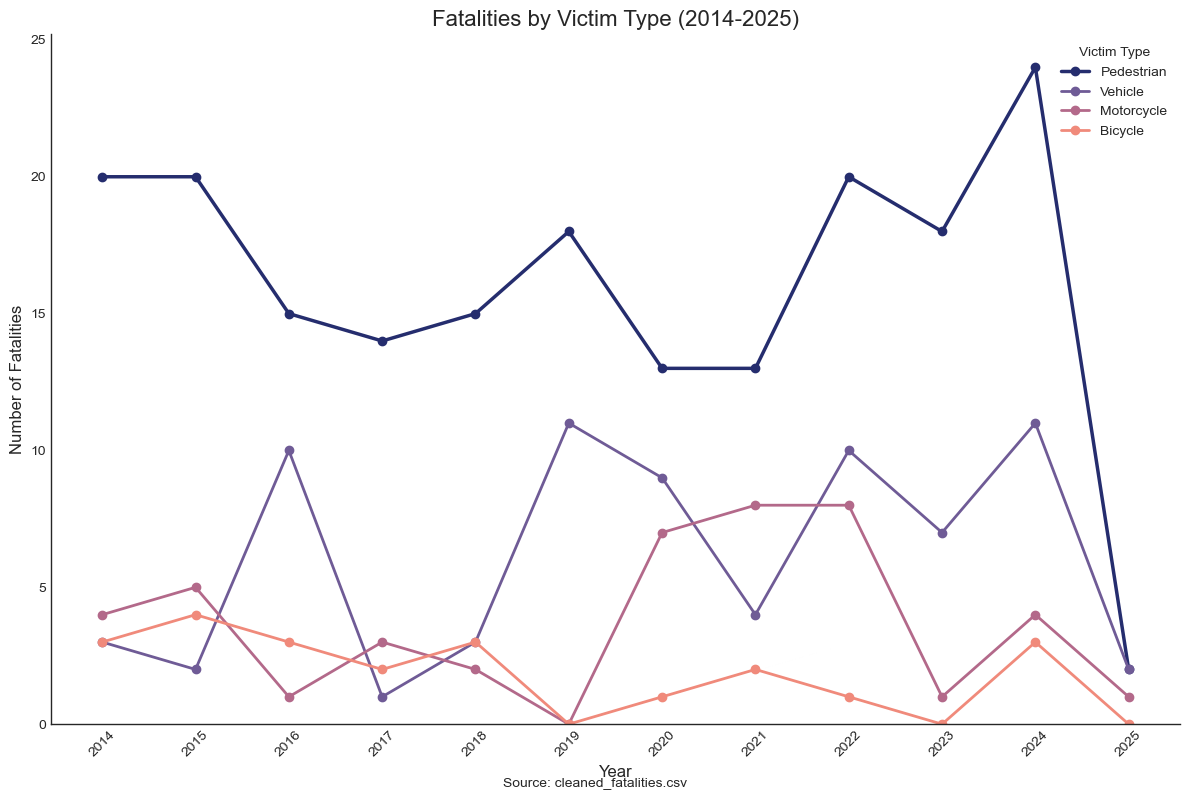


Fatalities by Victim Type 2014-2025:

  collision_category  Count
0            Bicycle     22
1         Motorcycle     44
2         Pedestrian    192
3            Vehicle     73




In [58]:
# D. Fatalities by Victim Type
# Create the plot
plt.figure(figsize=(12, 8))

# Get unique victim types (collision categories)
victim_types = df['collision_category'].unique()

# Get years for x-axis
years = sorted(df['collision_year_clean'].unique())

# Create a figure
plt.figure(figsize=(12, 8))

# Plot each victim type over time
for i, victim_type in enumerate(victim_types):
    # Filter data for this victim type
    victim_data = df[df['collision_category'] == victim_type]
    
    # Count by year
    yearly_counts = victim_data.groupby('collision_year_clean').size()
    
    # Create a complete series with all years (fill missing years with 0)
    yearly_series = pd.Series(0, index=years)
    yearly_series.update(yearly_counts)
    
    # Plot this victim type
    plt.plot(years, yearly_series.values, 
             marker='o', 
             linewidth=2.5 if victim_type == 'Pedestrian' else 2,
             color=sunset_melody[i % len(sunset_melody)],
             label=victim_type)

# Customize the plot
plt.title('Fatalities by Victim Type (2014-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(years, rotation=45)
plt.ylim(bottom=0)
plt.legend(title='Victim Type', loc='upper right')

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha='center', fontsize=10)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.savefig('../image/fatalities-victim-type.png')    # Save plot as image file
plt.show()

# Print a summary table
print('\nFatalities by Victim Type 2014-2025:\n')
victim_summary = df.groupby('collision_category').size().reset_index(name='Count')
print(victim_summary)
print('\n')

### E. Fatalities by Age Category and Collision Category (grouped bar chart)
This grouped bar chart presents fatality numbers categorized by age group (Child, Young Adult, Adult, Senior) and collision type (Bicycle, Motorcycle, Pedestrian, Vehicle). The chart indicates that pedestrian and vehicle collisions are the leading causes of fatalities across all age groups. Notably, adults and seniors experience the highest number of pedestrian fatalities.

<Figure size 1200x700 with 0 Axes>

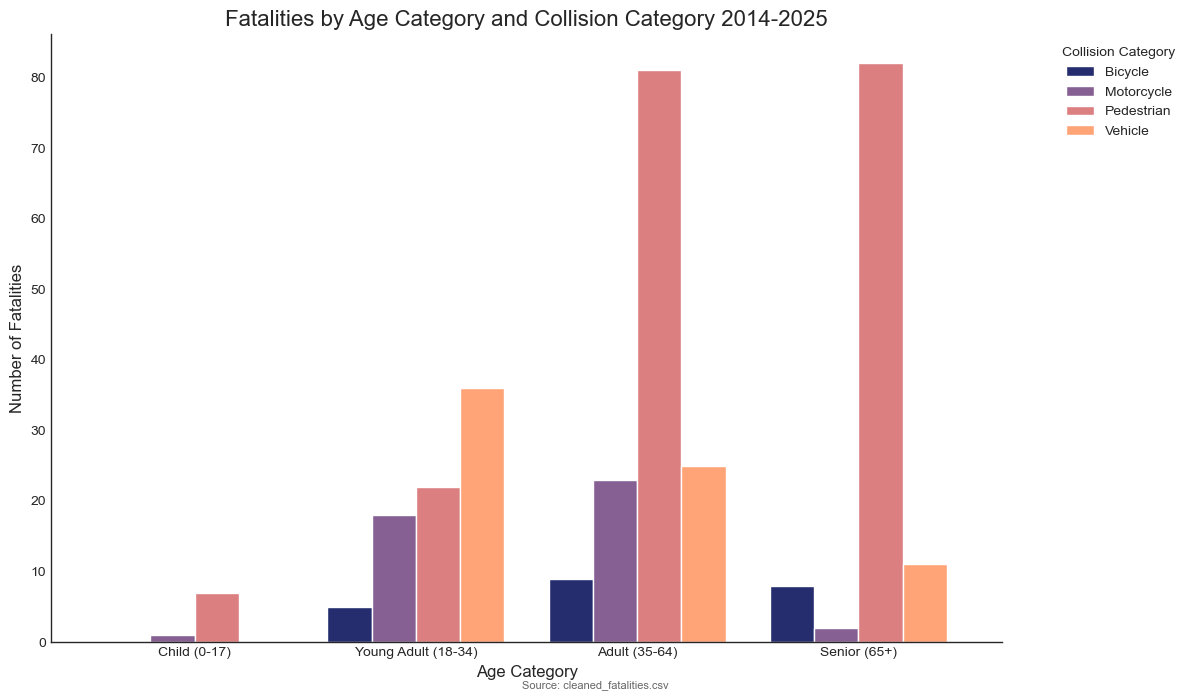



Fatalities by Age Category and Collision Category, 2014-2025:


collision_category   Bicycle  Motorcycle  Pedestrian  Vehicle
age_category                                                 
Child (0-17)               0           1           7        0
Young Adult (18-34)        5          18          22       36
Adult (35-64)              9          23          81       25
Senior (65+)               8           2          82       11




In [52]:
# E. Fatalities by age category and collision category (grouped bar chart)
plt.figure(figsize = (12, 7))
age_collision = pd.crosstab(df['age_category'], df['collision_category'])

# Sort age categories in a logical order
age_order = ['Child (0-17)', 'Young Adult (18-34)', 'Adult (35-64)', 'Senior (65+)']
age_collision = age_collision.reindex(age_order)

# Create the grouped bar chart
ax = age_collision.plot(kind = 'bar', figsize = (12, 7), width = 0.8, colormap = sunset_cmap)

# Add labels and title
plt.title('Fatalities by Age Category and Collision Category 2014-2025', fontsize = 16)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines
sns.despine(left = False, bottom = False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-age-collision-categories.png')    # Save plot as image file
plt.show()

# Print the table
print('\n')
print('Fatalities by Age Category and Collision Category, 2014-2025:')
print('\n')
print(age_collision)
print('\n')

### F. Age Distribution by Victim Type (box chart)

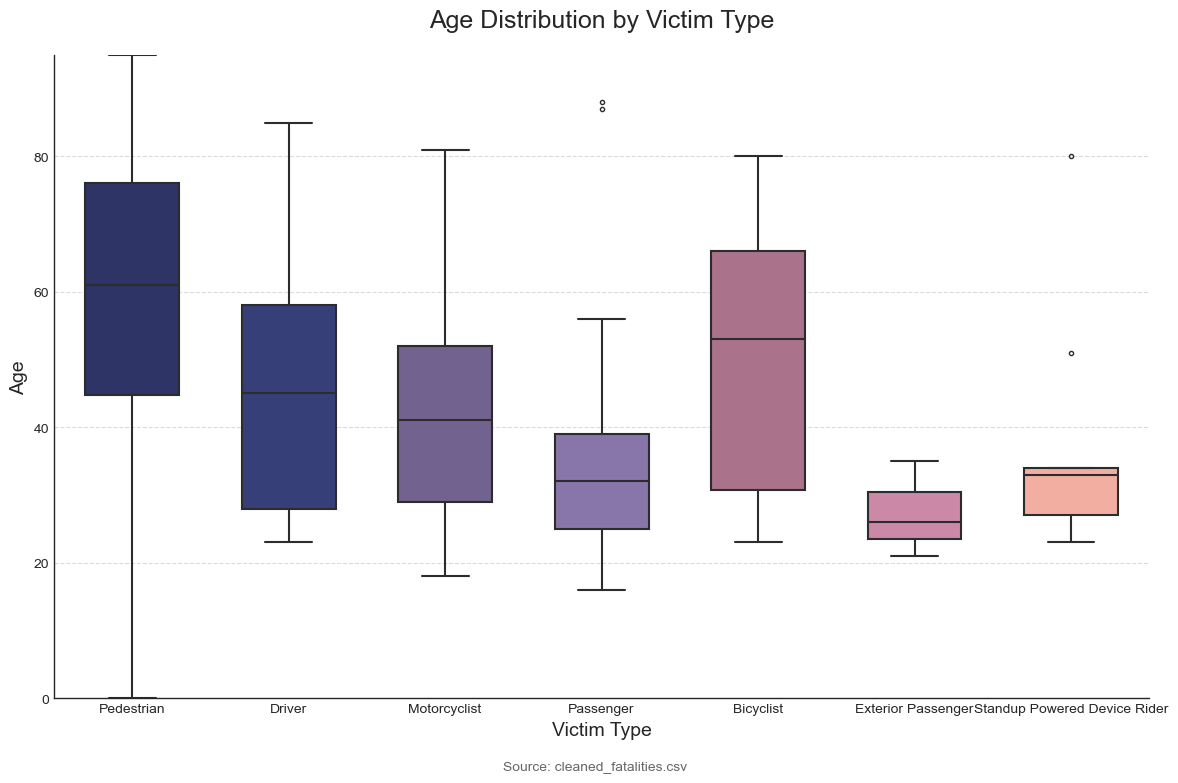


Age Distribution by Victim Type, 2014-2025:

                              Count  Mean Age  Median Age  Min Age  Max Age  \
deceased                                                                      
Pedestrian                      190      58.6        61.0      0.0     95.0   
Driver                           41      45.3        45.0     23.0     85.0   
Motorcyclist                     45      41.4        41.0     18.0     81.0   
Passenger                        17      38.6        32.0     16.0     88.0   
Bicyclist                        24      50.5        53.0     23.0     80.0   
Exterior Passenger                3      27.3        26.0     21.0     35.0   
Standup Powered Device Rider      9      37.3        33.0     23.0     80.0   

                              Std Dev  
deceased                               
Pedestrian                       20.7  
Driver                           18.7  
Motorcyclist                     14.8  
Passenger                        21.0  
Bi

In [53]:
# F. Age distribution by victim type
# Create a custom palette with enough colors for all victim types
# We'll cycle through the sunset melody colors and create variations
extended_palette = []
for color in sunset_melody:
    extended_palette.append(color)
    # Add a slightly lighter version of each color
    r, g, b = mcolors.to_rgb(color)
    lighter_color = (min(1, r*1.2), min(1, g*1.2), min(1, b*1.2))
    extended_palette.append(lighter_color)

# Create figure and axis
plt.figure(figsize=(12, 8))

# Define the order of victim types to match the image
victim_order = ['Pedestrian', 'Driver', 'Motorcyclist', 'Passenger', 
                'Bicyclist', 'Exterior Passenger', 'Standup Powered Device Rider']

# Create the box plot with ordered categories
ax = sns.boxplot(
    x='deceased',
    y='age',
    data=df,
    order=victim_order,  # Specify the order here
    hue='deceased',  # Add hue parameter
    palette=extended_palette[:8],  # Limit palette to number of categories
    width=0.6,
    fliersize=3,
    linewidth=1.5
)

# Set title and labels
plt.title('Age Distribution by Victim Type', fontsize=18, pad=20)
plt.xlabel('Victim Type', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Set y-axis limits
plt.ylim(0, 95)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Adjust tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha='center', fontsize=10, alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('../image/fatalities-by-age-victim-type-box-chart.png')    # Save plot as image file
plt.show()

# Create and print a table of age statistics by victim type
print('\nAge Distribution by Victim Type, 2014-2025:\n')

# Group by victim type and calculate age statistics
age_stats = df.groupby('deceased')['age'].agg([
    ('Count', 'count'),
    ('Mean Age', 'mean'),
    ('Median Age', 'median'),
    ('Min Age', 'min'),
    ('Max Age', 'max'),
    ('Std Dev', 'std')
]).round(1)

# Sort the table to match the visualization order
if all(victim in age_stats.index for victim in victim_order):
    age_stats = age_stats.reindex(victim_order)
    
print(age_stats)
print('\n')

### G. Distribution of Fatalities by Sex, 2014-2025 (bar chart)
This bar chart illustrates the distribution of fatalities by sex, female or male, in the years 2014-2025. As this chart shows, males account for 71% of fatalities (235), about 2.4 times the number of female, while female fatalities account for 29% (96).

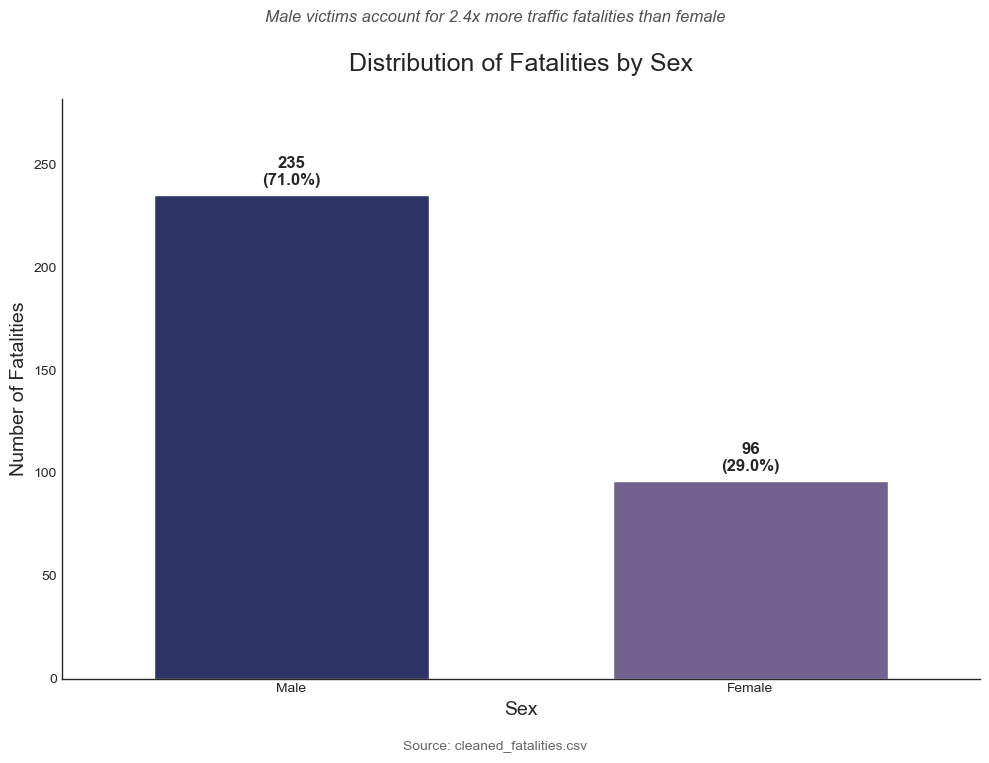


Distribution of Fatalities by Sex, 2014-2025:

      Sex  Count  Percentage
0    Male    235        71.0
1  Female     96        29.0




In [54]:
# G. Count fatalities by sex
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

# Calculate percentages
total = sex_counts['Count'].sum()
sex_counts['Percentage'] = (sex_counts['Count'] / total * 100).round(1)

# Create figure and axis
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sns.barplot(
    x='Sex',
    y='Count',
    data=sex_counts,
    palette=sunset_melody[:2],
    hue = 'Sex',
    width=0.6
)

# Add count and percentage labels on top of bars
for i, row in sex_counts.iterrows():
    ax.text(
        i, 
        row['Count'] + 5,  # Position text 5 units above the bar
        f"{int(row['Count'])}\n({row['Percentage']}%)",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Set title and labels
plt.title('Distribution of Fatalities by Sex', fontsize=18, pad=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)

# Set y-axis to start at 0 with some headroom for labels
plt.ylim(0, max(sex_counts['Count']) * 1.2)

# Remove spines
sns.despine()

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha='center', fontsize=10, alpha=0.7)

# Add a brief annotation explaining the disparity
if len(sex_counts) >= 2 and sex_counts.iloc[0]['Count'] > sex_counts.iloc[1]['Count']:
    dominant_sex = sex_counts.iloc[0]['Sex']
    ratio = round(sex_counts.iloc[0]['Count'] / sex_counts.iloc[1]['Count'], 1)
    plt.figtext(
        0.5, 0.92,
        f"Male victims account for {ratio}x more traffic fatalities than female",
        ha='center', fontsize=12, style='italic', alpha=0.8
    )

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.savefig('../image/fatalities-sex.png')    # Save plot as image file
plt.show()

# Print the table
print('\nDistribution of Fatalities by Sex, 2014-2025:\n')
print(sex_counts)
print('\n')

### H. Distribution of Fatalities by Collision Category, 2014-2025 (bar chart)
This bar chart illustrates the distribution of fatalities across different collision categories, including pedestrians (192 fatalities), vehicles (73 fatalities), motorcycles (44 fatalities), and bicycles (22 fatalities). According to this chart, which is sourced from our cleaned data, the number of pedestrian deaths by traffic collision from 2014-2025 (192) is greater than the number of vehicle, motorcycle, and bicycle deaths combined (139).

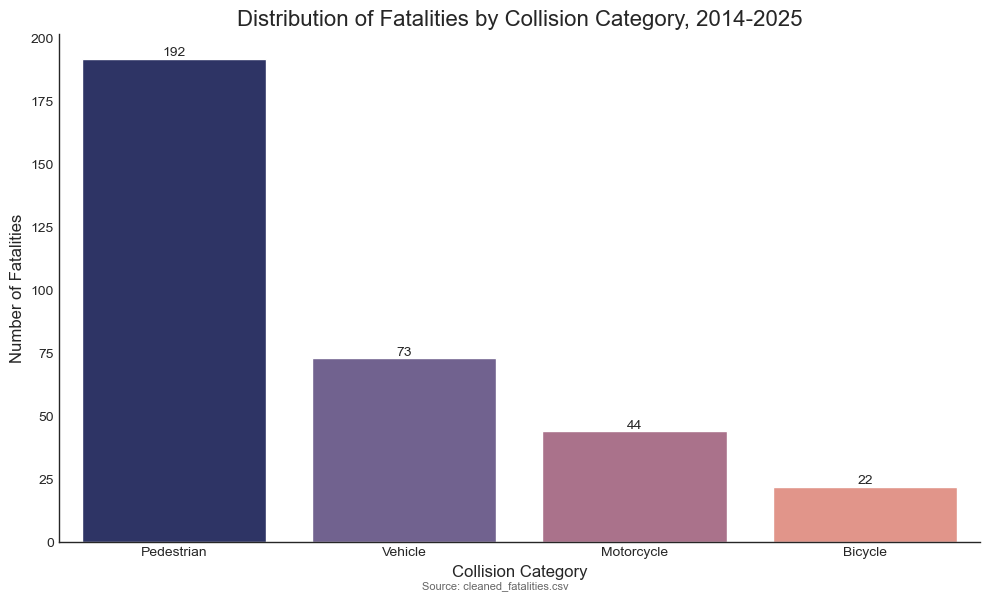


Distribution of Fatalities by Collision Category 2014-2025:

  Collision Category  Count
0         Pedestrian    192
1            Vehicle     73
2         Motorcycle     44
3            Bicycle     22




In [55]:
# H. Distribution of fatalities by collision category (bar chart)
plt.figure(figsize = (10, 6))
collision_counts = df['collision_category'].value_counts().reset_index()
collision_counts.columns = ['Collision Category', 'Count']

# Create the bar chart
ax = sns.barplot(
    x = 'Collision Category',
    y = 'Count', 
    data = collision_counts,
    hue = 'Collision Category',  # Add hue parameter
    palette = sunset_melody[:4],  # Limit palette to only 4 colors (matching categories)
    legend = False  # Hide the legend since it's redundant
    )

# Add labels and title
plt.title('Distribution of Fatalities by Collision Category, 2014-2025', fontsize = 16)
plt.xlabel('Collision Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(collision_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-collision-category.png')    # Save plot as image file
plt.show()

# Print the table
print('\nDistribution of Fatalities by Collision Category 2014-2025:\n')
print(collision_counts)
print('\n')

### I. Geographic Distribution of Fatalities, 2014-2025 (scatter plot on map)
This scatter plot visualizes the geographic distribution of traffic fatalities in San Francisco proper, differentiating between pedestrian, vehicle, motorcycle, and bicycle collisions based on their latitude and longitude coordinates. Our data reveals a central cluster of fatalities with some outliers, indicating areas with higher and lower concentrations of incidents.

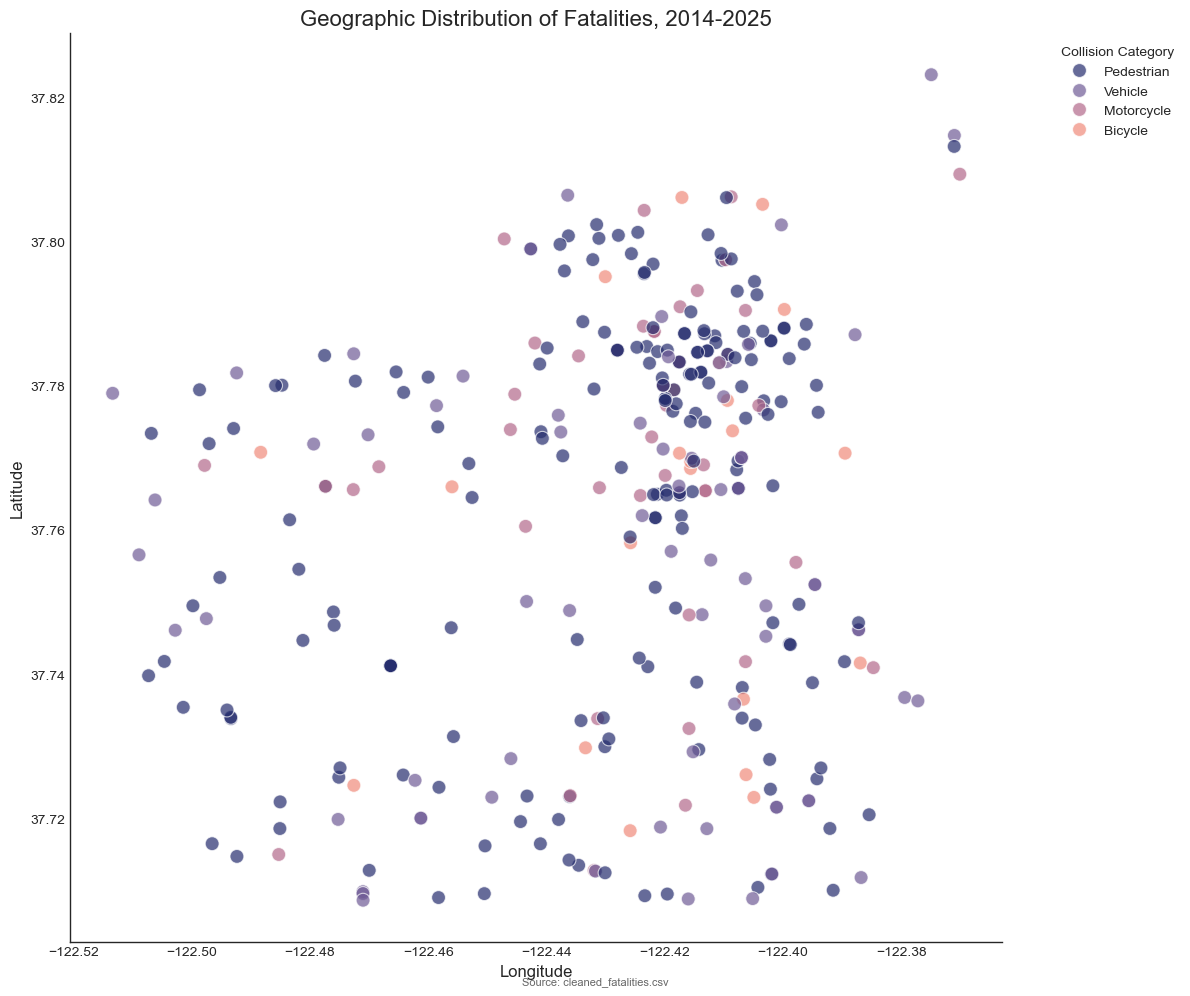


Geographic Distribution Summary Statistics, 2014-2025:


         latitude   longitude
count  331.000000  331.000000
mean    37.762136 -122.428658
std      0.027593    0.030399
min     37.708628 -122.513360
25%     37.740341 -122.442294
50%     37.769036 -122.419883
75%     37.783967 -122.407654
max     37.823175 -122.370075




In [56]:
# I. Geographic distribution of fatalities (scatter plot on map)
plt.figure(figsize = (12, 10))

# Create a scatter plot colored by collision category
scatter = sns.scatterplot(
    x = 'longitude', 
    y = 'latitude', 
    hue = 'collision_category',
    palette = sunset_melody [:4],
    s = 100,
    alpha = 0.7,
    data = df
)

# Add labels and title
plt.title('Geographic Distribution of Fatalities, 2014-2025', fontsize = 16)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines and grid
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-geographic.png')    # Save plot as image file
plt.show()

# Print summary statistics for geographic coordinates
print('\nGeographic Distribution Summary Statistics, 2014-2025:')
geo_stats = df[['latitude', 'longitude']].describe()
print('\n')
print(geo_stats)
print('\n')

### J. Heatmap of Fatalities by Month and Day of the Week, 2014-2025 (heatmap)

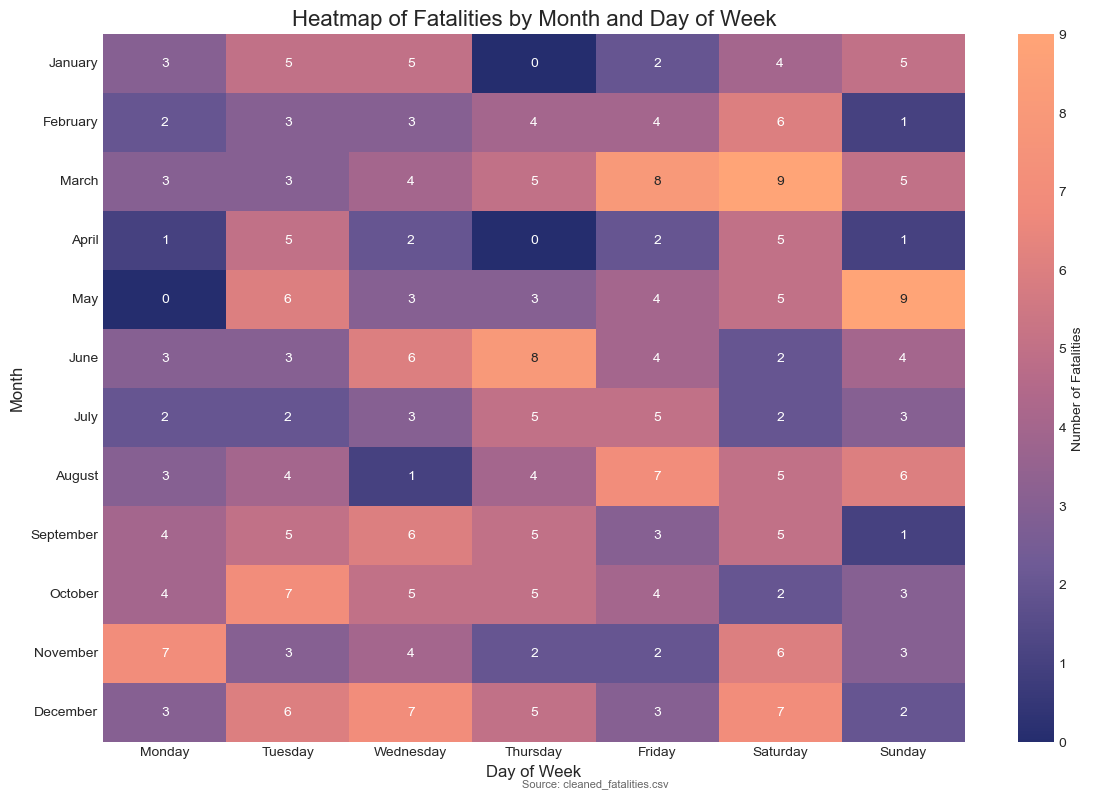


Fatalities by Month and Day of Week, 2014-2025:

day_name    Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month_name                                                                
January          3        5          5         0       2         4       5
February         2        3          3         4       4         6       1
March            3        3          4         5       8         9       5
April            1        5          2         0       2         5       1
May              0        6          3         3       4         5       9
June             3        3          6         8       4         2       4
July             2        2          3         5       5         2       3
August           3        4          1         4       7         5       6
September        4        5          6         5       3         5       1
October          4        7          5         5       4         2       3
November         7        3          4         2  

In [57]:
# J. Heatmap of fatalities by month and day of week
plt.figure(figsize = (12, 8))

# First convert collision_date to datetime if it's not already
df['collision_date'] = pd.to_datetime(df['collision_date'], errors = 'coerce')

# Extract month and day of week
df['month_name'] = df['collision_date'].dt.month_name()
df['day_name'] = df['collision_date'].dt.day_name()  # Add this line if day_name isn't already created

# Create a crosstab of month and day of week
month_day_counts = pd.crosstab(df['month_name'], df['day_name'])

# Reorder months and days
month_order = list(calendar.month_name)[1:]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_day_counts = month_day_counts.reindex(month_order).reindex(columns = day_order)

# Create the heatmap
ax = sns.heatmap(month_day_counts, cmap = sunset_cmap, annot = True, fmt = 'd', linewidths = 0, cbar_kws = {'label': 'Number of Fatalities'})

# Add labels and title
plt.title('Heatmap of Fatalities by Month and Day of Week', fontsize = 16)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('Month', fontsize = 12)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.savefig('../image/fatalities-heatmap.png')    # Save plot as image file
plt.show()

# Print the table
print('\nFatalities by Month and Day of Week, 2014-2025:\n')
print(month_day_counts)
print('\n')

In [21]:
# Statistical Analysis 1: Chi-square test for association between collision category and time of day
print('Statistical Analysis 1: Association between Collision Category and Time of Day')
contingency_table = pd.crosstab(df['collision_category'], df['time_of_day'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Contingency Table:\n{contingency_table}')
print(f'Chi-square statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
if p < 0.05:
    print('There is a significant association between collision category and time of day (p < 0.05)')
else:
    print('There is no significant association between collision category and time of day (p >= 0.05)')
print('\n')

Statistical Analysis 1: Association between Collision Category and Time of Day
Contingency Table:
time_of_day         Afternoon (12pm-5pm)  Morning (5am-12pm)  Night (9pm-5am)
collision_category                                                           
Bicycle                                4                  12                6
Motorcycle                             7                  21               16
Pedestrian                            40                 114               38
Vehicle                                8                  32               33
Chi-square statistic: 19.13
p-value: 0.0039
Degrees of freedom: 6
There is a significant association between collision category and time of day (p < 0.05)




In [22]:
# Statistical Analysis 2: ANOVA test for age differences across collision categories
print('Statistical Analysis 2: Age Differences Across Collision Categories')
categories = df['collision_category'].unique()
age_by_category = [df[df['collision_category'] == cat]['age'].dropna() for cat in categories]
f_stat, p_val = stats.f_oneway(*age_by_category)
print(f'ANOVA F-statistic: {f_stat:.2f}')
print(f'p-value: {p_val:.4f}')
if p_val < 0.05:
    print('There are significant differences in age across collision categories (p < 0.05)')
else:
    print('There are no significant differences in age across collision categories (p >= 0.05)')

# Print mean age by collision category
age_means = df.groupby('collision_category')['age'].mean().reset_index()
age_means.columns = ['Collision Category', 'Mean Age']
print('\nMean Age by Collision Category:')
print(age_means)

Statistical Analysis 2: Age Differences Across Collision Categories
ANOVA F-statistic: 17.22
p-value: 0.0000
There are significant differences in age across collision categories (p < 0.05)

Mean Age by Collision Category:
  Collision Category   Mean Age
0            Bicycle  52.681818
1         Motorcycle  41.022727
2         Pedestrian  58.276042
3            Vehicle  42.335616


---
# Next: [ML Model Development and Evaluation](/03-model-train-fit-eval.ipynb)
---